# Fitting a Line to Data Using Packages

So in core python, there is a fair amount of work involved to write a script to fit data - how about an easier way? 

Using packages specifically designed for line fitting is that easier way!  

## Using `statsmodel` 

First lets get things into a dataframe. Using the lists from the example above we can build a dataframe using pandas.

:::{note}
Here we are cheating a little because we already know what packages we want to use
:::


In [1]:
#Load the necessary packages
import numpy as np
import pandas as pd
import statistics 
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf # here is the regression package to fit lines

Now build a dataframe

In [3]:
distance = [2,4,11,7,17]
force = [2.0,3.5,8.0,4.5,9.5]
data = pd.DataFrame({'X':distance, 'Y':force}) # we use X,Y as column names for simplicity
data.head()

,X,Y
0,2,2.0
1,4,3.5
2,11,8.0
3,7,4.5
4,17,9.5


Now we will define and fit a linear model to the data, observe the rather simple syntax, no for-loops!

In [4]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Y ~ X', data=data) # model object constructor syntax
model = model.fit()

Now to get output from the model, first we will generate a summary table

In [5]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     68.00
Date:                Tue, 12 Apr 2022   Prob (F-statistic):            0.00373
Time:                        21:07:25   Log-Likelihood:                -4.3518
No. Observations:                   5   AIC:                             12.70
Df Residuals:                       3   BIC:                             11.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2794      0.611      2.094      0.1

/opt/jupyterhub/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


The model parameters are contained in a tuple named `model.params` which we could query for making a plot.  Below we will access this as well as some other values from the fitting tool.  We can get a listing of all the available properties from the [package documentation](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html)

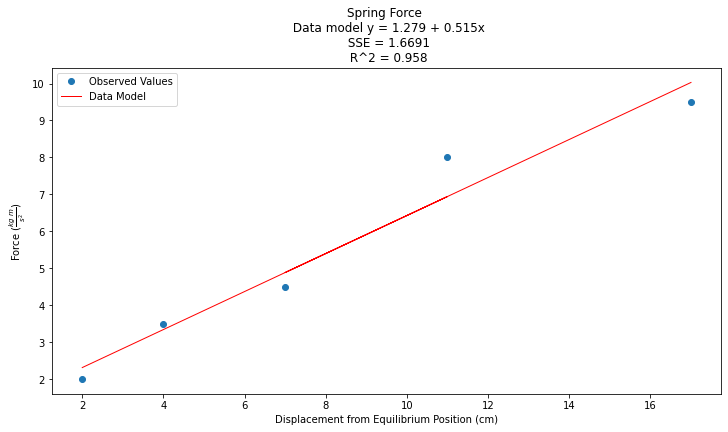

In [19]:
# Predict values
y_pred = model.predict()

beta0 = model.params[0] # the fitted intercept
beta1 = model.params[1]
sse = model.ssr
rsq = model.rsquared

titleline = "Spring Force \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], y_pred, 'r', linewidth=1)   # regression line
plt.xlabel('Displacement from Equilibrium Position (cm)')
plt.ylabel('Force '+r'($\frac{kg~m}{s^2}$)')
plt.legend(['Observed Values','Data Model'])
plt.title(titleline)

plt.show();

## Using `sklearn`

Again we will use dataframes from pandas.  We have some reading to do at the [sklearn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) documentation site.

In [21]:
# repeat using sklearn
# Multiple Linear Regression with scikit-learn:
from sklearn.linear_model import LinearRegression

# Build linear regression model using X as predictors
# Split data into predictors X and output Y
predictors = ['X'] # this seems odd, but will make sense when we add predictors later
X = data[predictors]
y = data['Y']

# Initialise and fit model
lm = LinearRegression()  # This is the sklearn model tool here
model = lm.fit(X, y)

Now the model is fit next we
- Make predictions (`sklearn` specific calls)
- Recover the betas
- Compute SSE and $R^2$
- Build a plot

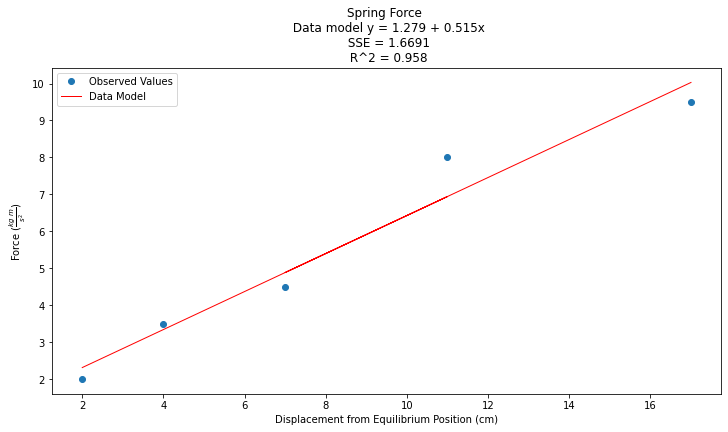

In [40]:
# Predict values
y_pred = model.predict(X)

beta0 = model.intercept_ # the fitted intercept
beta1 = model.coef_[0]

from sklearn.metrics import mean_squared_error, r2_score
sse = len(y)*mean_squared_error(y,y_pred) # shenigians here to get value same as homebrew
rsq = r2_score(y,y_pred) # no shenigians here, but goofy ass function call


titleline = "Spring Force \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,3)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['X'], data['Y'], 'o')           # scatter plot showing actual data
plt.plot(data['X'], y_pred, 'r', linewidth=1)   # regression line
plt.xlabel('Displacement from Equilibrium Position (cm)')
plt.ylabel('Force '+r'($\frac{kg~m}{s^2}$)')
plt.legend(['Observed Values','Data Model'])
plt.title(titleline)

plt.show();

At this point we certainly have tools to fit straight lines.  

:::{admonition} Summary
:class: tip

Use of a package greatly simplifies curve fitting, but we have to read how to use a package.

- The goal is to fit a data model to data
- `statsmodel` provides a nice interface, obtain same results as our homebrew scripts
- `sklearn` is another package, also same results
- Use the package you like, plot your results to check your conclusions
:::

:::{warning}
The plots become tricky using the packages.  Here they look fine, but are actually flawed because the plot series are not sorted.  Remember line plots expect sorted x-values.  When we get to later plots we amy have to sort the predictions to get the plots to look decent.
:::

## References

1. [Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric and statistical modeling with python.” Proceedings of the 9th Python in Science Conference. 2010.](https://www.statsmodels.org/dev/index.html)
2. [Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.](https://scikit-learn.org/stable/index.html)

